Analysis and Visualization of WikiSRAT data
===

In this notebook, we create interactive visualizations of data in the WikiSRAT database.

Run within a conda environment specified in the included `environment.yml` file. 

Create the environment with either the Import button on Anaconda Navigator's Environments tab, or this Conda command in your terminal or console, replacing `path/environment.yml` with the full file pathway to the environment.yml file in the local cloned repository.

```bash
conda env create --file path/environment.yml
```

To update your environment, either use Anaconda Navigator, or run the following command:

```bash
conda env update --file path/environment.yml --prune
```

or

```bash
conda env create --file path/environment.yml --force
```

# Setup
* Import packages
* Load data from parquet files

In [4]:
# packages for data requests
import requests
import pandas as pd
from requests.auth import HTTPBasicAuth
import json
import os
import psycopg2

from pathlib import Path

# packages for viz 
import matplotlib.pyplot as plt
# from pynhd import NLDI, WaterData, NHDPlusHR
# import pynhd as nhd
import geopandas as gpd
import plotly.express as px

# import geoviews as gv
# import geoviews.feature as gf
# from geoviews import opts
# from cartopy import crs 
# import geoviews.tile_sources as gts
# gv.extension('bokeh', 'matplotlib')
# import hvplot.pandas


In [5]:
# Find current working directory
Path.cwd()

PosixPath('/Users/aaufdenkampe/Documents/Python/WikiSRATMicroService')

In [7]:
# username = "Sarah"
username = "Anthony"

In [9]:
# Set alternate project & data folders
if username == "Anthony":
    project_folder = Path('/Users/aaufdenkampe/Documents/Python/WikiSRATMicroService')
elif username == "Sarah":
    project_folder = Path('C:/Users/sjordan/Documents/Python/WikiSRATMicroService')
data_folder    = Path('data/')

In [11]:
%%time
# read data from parquet files
base_gdf = gpd.read_parquet(project_folder / data_folder /'base_df.parquet')
rest_gdf = gpd.read_parquet(project_folder / data_folder /'rest_df.parquet')

CPU times: user 1.92 s, sys: 148 ms, total: 2.07 s
Wall time: 2.04 s


In [17]:
base_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19496 entries, 0 to 19495
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   comid                 19496 non-null  int64   
 1   tploadrate_total      19496 non-null  float64 
 2   tploadate_conc        19496 non-null  float64 
 3   tnloadrate_total      19496 non-null  float64 
 4   tnloadate_conc        19496 non-null  float64 
 5   tssloadrate_total     19496 non-null  float64 
 6   tssloadate_conc       19496 non-null  float64 
 7   catchment_hectares    19496 non-null  float64 
 8   watershed_hectares    19496 non-null  float64 
 9   tploadrate_total_ws   19496 non-null  float64 
 10  tnloadrate_total_ws   19496 non-null  float64 
 11  tssloadrate_total_ws  19496 non-null  float64 
 12  maflowv               19496 non-null  float64 
 13  geom                  19266 non-null  geometry
 14  geom_catchment        19496 non-null  geometry

In [13]:
# define catchments as geometry
base_gdf_catch = gpd.GeoDataFrame(base_gdf, geometry="geom_catchment")
rest_gdf_catch = gpd.GeoDataFrame(rest_gdf, geometry="geom_catchment")

In [19]:
rest_gdf_catch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19496 entries, 0 to 19495
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   comid                 19496 non-null  int64   
 1   tploadrate_total      19496 non-null  float64 
 2   tploadate_conc        19496 non-null  float64 
 3   tnloadrate_total      19496 non-null  float64 
 4   tnloadate_conc        19496 non-null  float64 
 5   tssloadrate_total     19496 non-null  float64 
 6   tssloadate_conc       19496 non-null  float64 
 7   catchment_hectares    19496 non-null  float64 
 8   watershed_hectares    19496 non-null  float64 
 9   tploadrate_total_ws   19496 non-null  float64 
 10  tnloadrate_total_ws   19496 non-null  float64 
 11  tssloadrate_total_ws  19496 non-null  float64 
 12  maflowv               19496 non-null  float64 
 13  geom                  19266 non-null  geometry
 14  geom_catchment        19496 non-null  geometry

In [18]:
base_gdf.loc[base_gdf['comid']== 4150436]

,comid,tploadrate_total,tploadate_conc,tnloadrate_total,tnloadate_conc,tssloadrate_total,tssloadate_conc,catchment_hectares,watershed_hectares,tploadrate_total_ws,tnloadrate_total_ws,tssloadrate_total_ws,maflowv,geom,geom_catchment,cluster,fa_name,sub_focusarea,nord,nordstop
3650,4150436,30.8258,0.0069,645.9509,0.1384,47796.1351,11.3997,641.099,925.38,0.0452,0.906,74.6255,6.779,MULTILINESTRING Z ((511409.255 4584386.375 0.0...,"MULTIPOLYGON (((512037.914 4582958.736, 511978...",Poconos and Kittatinny,Twin Lakes,3.0,72173.0,72175.0


# Static Plots 

Plot with GeoPandas

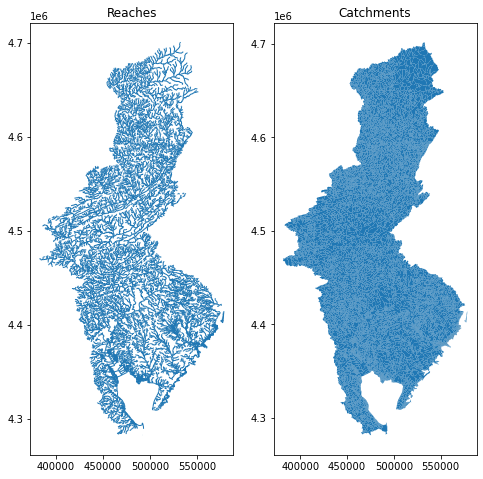

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2)
base_gdf.plot(lw=1, ax=ax1)
base_gdf_catch.plot(lw=0.1, ax=ax2)
fig.set_size_inches(8,8)
ax1.set_title("Reaches")
ax2.set_title("Catchments")
plt.show()

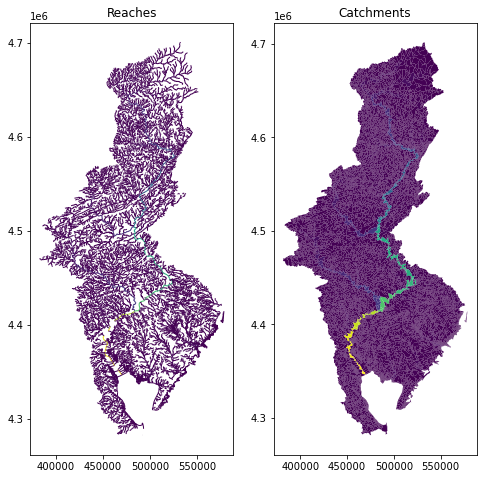

Wall time: 5.63 s


In [26]:
%%time
fig, (ax1, ax2) = plt.subplots(1,2)
base_gdf.plot(column = 'maflowv', lw=1, ax=ax1)
base_gdf_catch.plot(column = 'maflowv', lw=0.1, ax=ax2)
fig.set_size_inches(8,8)
ax1.set_title("Reaches")
ax2.set_title("Catchments")
plt.show()

In [43]:
base_gdf_catch.cluster.unique()

array(['drb', 'Poconos and Kittatinny', 'New Jersey Highlands',
       'Kirkwood - Cohansey Aquifer', 'Middle Schuylkill', 'Upper Lehigh',
       'Upstream Suburban Philadelphia', 'Schuylkill Highlands', None,
       'Brandywine and Christina'], dtype=object)

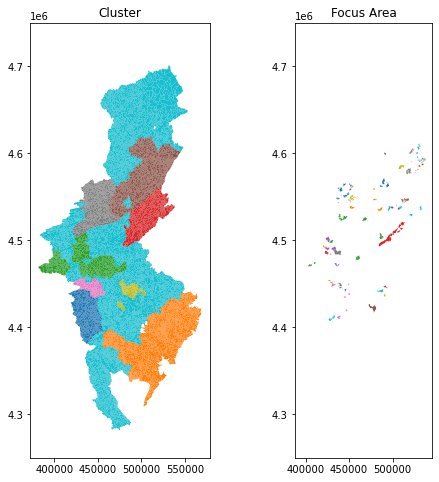

In [50]:
# color by cluster 
fig, (ax1, ax2) = plt.subplots(1,2)
base_gdf_catch[base_gdf_catch.cluster != 'None'].plot(column = 'cluster', lw=0.1, ax=ax1)
base_gdf_catch[base_gdf_catch.cluster != 'None'].plot(column = 'fa_name', lw=0.1, ax=ax2)

fig.set_size_inches(8,8)
ax1.set_title("Cluster")
ax2.set_title("Focus Area")
for ax in [ax1, ax2]:
    ax.set_ylim(4.25 * 10**6, 4.75 * 10**6)
plt.show()

# Dynamic Plots

## px.chloropleth_mapbox

Un-comment out cells below to commit -- otherwise, the files are too large.

https://stackoverflow.com/questions/46891914/control-mapbox-extent-in-plotly-python-api

Remove borders: https://stackoverflow.com/questions/61420022/plotly-choropleth-without-borders

In [52]:
# project for plotly
base_gdf_catch_proj = base_gdf_catch.to_crs(epsg=4326)

In [87]:
# %%time
# fig = px.choropleth_mapbox(base_gdf_catch_proj,
#                            geojson=base_gdf_catch_proj.geom_catchment,
#                            locations=base_gdf_catch_proj.index,
#                            color='maflowv',
#                            color_continuous_scale="Viridis",
#                            # range_color=(0, 12),
#                            # width=200,
#                            mapbox_style="carto-positron",
#                            zoom=6,
#                            center = {"lat": 40.4604, "lon": -74.8334},
#                            opacity=0.5,
#                            height = 500,
#                            # width = 100
#                            labels={'Comid':'comid'}
#                           )
# fig.update_traces(marker_line_color='rgba(255,255,255,0)', selector=dict(type='choroplethmapbox')) #make the border transparent
# fig.update_layout(margin={"r":300,"t":0,"l":300,"b":0})
# # fig['layout']['geo']['subunitcolor']='rgba(0,0,0,0)'

# fig.show()

## Plotting multiline

Extract latitudes and longitudes -- this is not great in plotly.

Maybe utlimately try something with bokeh and geopandas?
https://kodu.ut.ee/~kmoch/geopython2018/lessons/L5/interactive-map-bokeh.html

In [78]:
%%time

# plot lines https://plotly.com/python/lines-on-mapbox/
import numpy as np

lats = []
lons = []
names = []
colors = []

i = 0 
tot = len(base_gdf.geom)

for feature, name, mfv in zip(base_gdf_proj.geom, base_gdf_proj.comid, base_gdf_proj.maflowv):

    if feature == None:
        pass
    else:
        linestrings = feature


        for linestring in linestrings:
            x, y = linestring.xy
            lats.extend(y)
            lons.extend(x)
            names.extend([name]*len(y))
            colors.extend([mfv]*len(y))
            lats.extend([None])
            lons.extend([None])
            names.extend([None])
            colors.extend([None])
    pct = round(i / tot * 100, 2)
    if pct % 10 == 0:
        print(str(pct) + "% done") 
    i += 1

0.0% done
10.0% done
10.0% done
20.0% done
20.0% done
30.0% done
30.0% done
40.0% done
40.0% done
50.0% done
60.0% done
60.0% done
70.0% done
70.0% done
80.0% done
80.0% done
90.0% done
90.0% done
Wall time: 1.24 s


NOTE: Sarah, this function above might be made much more efficient by avoiding the use of np.append() inside the loop. If I remember, np.append is very slow because it reallocates memory each time. List append is very fast, however, so its often recommened in these cases to create a list using the loop, then convert that list into an array in one final step.

Anthony: done, much faster. 

In [88]:
# %%time
# fig = px.line_mapbox(lat=lats, lon=lons, hover_name=names,
#                      mapbox_style="carto-positron",
#                      # color=colors,
#                      zoom=6,
#                      center = {"lat": 40.4604, "lon": -74.8334},
#                      height=500
#                     )
# fig.update_layout(margin={"r":300,"t":0,"l":300,"b":0})
# fig.show()

In [22]:
len(colors) == len(lats)

True

## go.Chloroplethmapbox

Different option within plotly, which includes option to remove borders:
* https://plotly.com/python/mapbox-county-choropleth/

In [23]:
# set up for chloropleth map 
geo_df_g2_json = json.loads(base_gdf_.to_json())

In [89]:
# %%time
# import plotly.graph_objects as go

# token = "pk.eyJ1Ijoic2pvcmRhbjI5IiwiYSI6ImNrc3Jzb2Y4ODBwbTYybnA3MjloZ2RjMHcifQ.6IVtsCFcLvhLFNl_IF9OqA"
# fig = go.Figure(go.Choroplethmapbox(geojson=geo_df_g2_json,
#                                     locations=base_gpd.index,
#                                     z = base_gpd['maflowv'],
#                                     colorscale="Viridis",
#                                     marker_line_width=0,
# #                                   #  height
#                                    ))
# fig.update_layout(mapbox_style="light", mapbox_accesstoken=token,
#                   mapbox_zoom=6, mapbox_center = {"lat": 40.4604, "lon": -74.8334})
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

# Next steps
* Drop down menus - maybe (low priority)
* Add polylines to plotly map? 
* Flip on and off different features?

Questions:
* units? Got them
* Does Mike have info on larger geographic areas and their relaton to comids? Yes, done

Future next steps:
* Arithmetic on columns 
* Organized efforts into geographic **clusters** --> **focus areas**  --> **pour points** --> Done. 
* HUC12 (similar map)

**Units:** 
* Concentration: mg/L
* loadrate_totals: kg/yr
* loadrate_total_ws: attempt to get loadrate totals to kg/ha: fails if mean annual flow doesn't exist = ((loadate_conc * 28.3168 * 31557600 / 1000000) * maflowv) / watershed_hectares 